In [5]:
import numpy as np
import pickle
import pandas as pd
import glob, os
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec as gs
import pickle as pk

In [79]:
# load data
dest_folder = '/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/NMF_output/'

df = pd.read_excel('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/rep1_spikein_curated.xls')
ribo = pd.read_excel('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/ribo_curated.xls')
ribo_hen = pd.read_excel('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/references/Hentschel_etal_ribo.xlsx')
raw_data = np.load('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/packed_rep1_spikein.npy')
gff = pd.read_excel('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/start_over_once_more/references/Msm_gff.xlsx')
GEMATRIA_NMF = np.load(dest_folder+'NMF_regrouped.npy')
h = np.load(dest_folder+'NMF_basis.npy')
w = np.load(dest_folder+'NMF_encoding.npy')

data = np.load('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/packed_rep1_spikein_poleneglect.npy')
model = pk.load(open(dest_folder+'NMF_model.pk','rb'))
imdlist = pd.read_excel('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/figures/imd_plots/imd_list.xlsx')

In [13]:
# reshape data:
def min_max_normalization(data, pad=0.01):
    # Min-max normalization function
    # constrain zero entries by padding the data with a 0.01 background
    return ((data-data.min())/(data.max()-data.min())+pad)/(1+pad)

def feature_plot(basis_image,vmax=None):
    from matplotlib.gridspec import GridSpec as gs
    nfeatures = basis_image.shape[0]
    ncols = 5
    if nfeatures%ncols == 0:
        nrows = int(nfeatures/ncols)
    else:
        nrows = int(nfeatures/ncols)+1
    fig = plt.figure(figsize=(ncols*2,nrows*1.2))
    grids = gs(nrows,ncols,hspace=0.4,wspace=0.1)
    for r in range(nrows):
        for c in range(ncols):
            idx = r*ncols+c
            if  idx <= nfeatures:
                ax = fig.add_subplot(grids[r,c])
                if vmax == None:
                    vmax = basis_image[idx].max()
                ax.imshow(basis_image[idx].reshape(15,30),aspect='auto')
                ax.set_xticks([])
                ax.set_yticks([])
                ax.set_title('feature {}'.format(idx+1))
    return fig

curated_id = df['Original_index'].values

L=10
stacked = np.zeros((len(curated_id)*data.shape[1],data.shape[2]))
for k,i in enumerate(curated_id):
    temp = min_max_normalization(data[i])
    stacked[k*L:(k+1)*L] = temp

In [16]:
pole_neglect_w = model.transform(stacked)

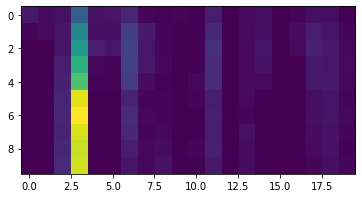

In [23]:
plt.imshow(pole_neglect_w[idx*10:idx*10+10])

Text(1.0, 1.0, 'Cell-length dependent pole association of IMD proteins')

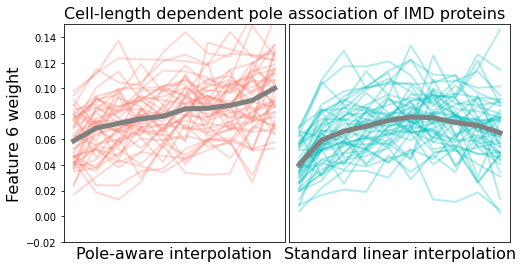

In [94]:
fig=plt.figure(figsize=(8,4))
grids = gs(1,2,wspace=0.02)
imd_pole_aware = []
imd_pole_neglect = []
ax1 = fig.add_subplot(grids[:,0])
ax2 = fig.add_subplot(grids[:,1])
ax1.set_ylim(-0.02,0.15)
ax2.set_ylim(-0.02,0.15)
ax2.set_yticks([])
for ax in [ax1,ax2]:
    ax.set_xticks([])
for l in imdlist['locus'].values:
    idx = np.where(df['locus'].values==l)[0][0]
    pole_aware = w[idx*10:idx*10+10,15]#+w[idx*10:idx*10+10,3]
    pole_neglect = pole_neglect_w[idx*10:idx*10+10,15]#+pole_neglect_w[idx*10:idx*10+10,3]
    ax1.plot(pole_aware,c='salmon',lw=2,alpha=0.3)
    ax2.plot(pole_neglect,c='c',lw=2,alpha=0.3)
    imd_pole_aware.append(pole_aware)
    imd_pole_neglect.append(pole_neglect)
ax1.set_ylabel('Feature 6 weight',fontsize=16)
ax1.plot(np.mean(np.array(imd_pole_aware),axis=0),c='grey',lw=5)
ax2.plot(np.mean(np.array(imd_pole_neglect),axis=0),c='grey',lw=5)
ax1.set_xlabel('Pole-aware interpolation',fontsize=16)
ax2.set_xlabel('Standard linear interpolation',fontsize=16)
ax1.set_title('Cell-length dependent pole association of IMD proteins',loc='right',ha='center',fontsize=16)
#plt.savefig('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/figures/pole_concat.png',bbox_inches='tight',dpi=100)

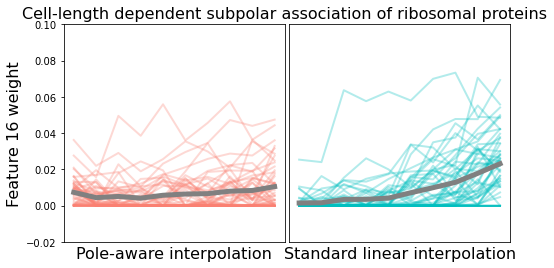

In [92]:
fig=plt.figure(figsize=(8,4))
grids = gs(1,2,wspace=0.02)
ribo_pole_aware = []
ribo_pole_neglect = []
ax1 = fig.add_subplot(grids[:,0])
ax2 = fig.add_subplot(grids[:,1])
ax1.set_ylim(-0.02,0.1)
ax2.set_ylim(-0.02,0.1)
ax2.set_yticks([])
for ax in [ax1,ax2]:
    ax.set_xticks([])
for l in ribo['locus'].values:
    if l in df['locus'].values:
        idx = np.where(df['locus'].values==l)[0][0]
        pole_aware = w[idx*10:idx*10+10,15]#+w[idx*10:idx*10+10,3]
        pole_neglect = pole_neglect_w[idx*10:idx*10+10,15]#+pole_neglect_w[idx*10:idx*10+10,3]
        ax1.plot(pole_aware,c='salmon',lw=2,alpha=0.3)
        ax2.plot(pole_neglect,c='c',lw=2,alpha=0.3)
        ribo_pole_aware.append(pole_aware)
        ribo_pole_neglect.append(pole_neglect)
ax1.set_ylabel('Feature 16 weight',fontsize=16)
ax1.plot(np.mean(np.array(ribo_pole_aware),axis=0),c='grey',lw=5)
ax2.plot(np.mean(np.array(ribo_pole_neglect),axis=0),c='grey',lw=5)
ax1.set_xlabel('Pole-aware interpolation',fontsize=16)
ax2.set_xlabel('Standard linear interpolation',fontsize=16)
ax1.set_title('Cell-length dependent subpolar association of ribosomal proteins',loc='right',ha='center',fontsize=16)
plt.savefig('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/figures/ribo_pole_concat.png',bbox_inches='tight',dpi=100)

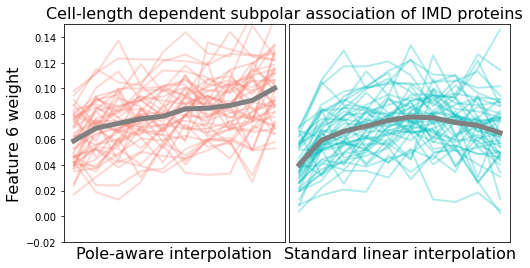

In [95]:
fig=plt.figure(figsize=(8,4))
grids = gs(1,2,wspace=0.02)
imd_pole_aware = []
imd_pole_neglect = []
ax1 = fig.add_subplot(grids[:,0])
ax2 = fig.add_subplot(grids[:,1])
ax1.set_ylim(-0.02,0.15)
ax2.set_ylim(-0.02,0.15)
ax2.set_yticks([])
for ax in [ax1,ax2]:
    ax.set_xticks([])
for l in imdlist['locus'].values:
    idx = np.where(df['locus'].values==l)[0][0]
    pole_aware = w[idx*10:idx*10+10,15]#+w[idx*10:idx*10+10,3]
    pole_neglect = pole_neglect_w[idx*10:idx*10+10,15]#+pole_neglect_w[idx*10:idx*10+10,3]
    ax1.plot(pole_aware,c='salmon',lw=2,alpha=0.3)
    ax2.plot(pole_neglect,c='c',lw=2,alpha=0.3)
    imd_pole_aware.append(pole_aware)
    imd_pole_neglect.append(pole_neglect)
ax1.set_ylabel('Feature 6 weight',fontsize=16)
ax1.plot(np.mean(np.array(imd_pole_aware),axis=0),c='grey',lw=5)
ax2.plot(np.mean(np.array(imd_pole_neglect),axis=0),c='grey',lw=5)
ax1.set_xlabel('Pole-aware interpolation',fontsize=16)
ax2.set_xlabel('Standard linear interpolation',fontsize=16)
ax1.set_title('Cell-length dependent subpolar association of IMD proteins',loc='right',ha='center',fontsize=16)
plt.savefig('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/figures/IMD_subpolarpole_concat.png',bbox_inches='tight',dpi=100)

In [127]:
mmpl3

45

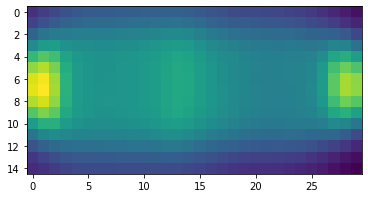

In [110]:
plt.imshow(np.mean(raw_data[ttfA],axis=0).reshape(15,30))

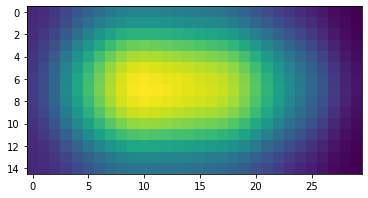

In [111]:
plt.imshow(np.mean(raw_data[ssb],axis=0).reshape(15,30))